# Bayesian Optimization
## Active learning
I'm trying to use a very bad prior just to try. However, the results are very shitty. Better to learn how gaussian processes work 

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [117]:
def uni_variate(x):
    return 0.09*x**5 - 0.01*x**4 -x**3 - 5*x**2 + 2*x + 400 - 0.1*np.exp(x)


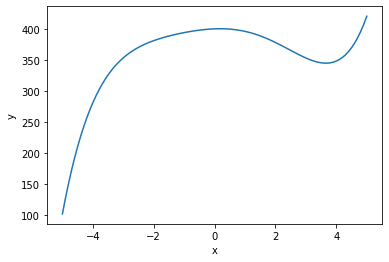

In [118]:
N_SAMPLES = 100
x = np.linspace(-5,5, N_SAMPLES)
y = uni_variate(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [197]:
def surrogate_model(x_obs, y_obs):
    # transforms obs in a two-degree polinomial
    x_obs_sq = quadr_features(x_obs)
    # linear regression
    reg = LinearRegression().fit(X=x_obs_sq, y=y_obs)
    return reg

def quadr_features(X):
    X_n = X.reshape(-1,1)
    return PolynomialFeatures(2, include_bias=True).fit_transform(X_n)

def update_prior(x, prior, x_sample, y_sample=None):
    for i in range(len(prior)):
        prior[i] = prior[i]*(1 - abs(x[i]-x_sample)/20)
        if(prior[i] < 0):
            prior[i] = 0
        # if abs(x[i]-x_sample) < 1:
        #     prior[i] += 2*prior[i]
        # else:
        #     prior[i] -= 0.1*prior[i]
    #normalize probability
    return prior/np.sum(prior)


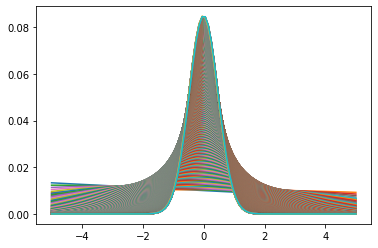

In [200]:
prior = np.ones(N_SAMPLES) / N_SAMPLES
x = np.linspace(-5,5, N_SAMPLES)
n_tentativi = 1000
x_samples = []#[-5, -4.8, -4.7]
y_samples = []#[uni_variate(-5), uni_variate(-4.8), uni_variate(-4.7)]
for i in range(n_tentativi):
    # observation
    x_s = x[np.argmin(prior)]
    y_s = uni_variate(x_s)
    x_samples.append(x_s)
    y_samples.append(y_s)
    # retrain surrogate
    x_arr = np.array(x_samples)
    y_arr = np.array(y_samples)
    y_surrogate = surrogate_model(x_arr, y_arr).predict(quadr_features(x))
    # update prior
    prior = update_prior(x, prior, x_s, y_s)
    plt.plot(x,prior)


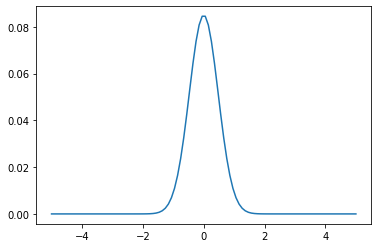

In [199]:
plt.plot(x,prior)


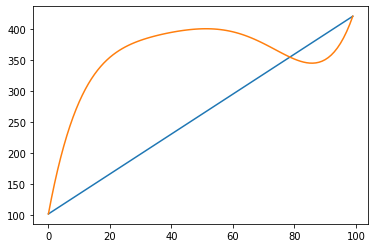

In [202]:
plt.plot(y_surrogate)
plt.plot(y)

In [168]:
x_samples

[-5.0,
 -3.9898989898989896,
 -2.9797979797979797,
 -1.9696969696969697,
 -0.9595959595959593,
 0.050505050505050164,
 1.0606060606060606,
 2.070707070707071,
 3.0808080808080813,
 4.09090909090909,
 -5.0,
 -3.9898989898989896,
 -2.9797979797979797,
 -1.9696969696969697,
 2.070707070707071,
 3.0808080808080813,
 4.09090909090909,
 -0.9595959595959593,
 0.050505050505050164,
 1.0606060606060606,
 -5.0,
 -3.9898989898989896,
 -2.9797979797979797,
 -1.9696969696969697,
 -0.9595959595959593,
 2.070707070707071,
 3.0808080808080813,
 4.09090909090909,
 0.050505050505050164,
 1.0606060606060606,
 4.09090909090909,
 -3.9898989898989896,
 -2.9797979797979797,
 -1.9696969696969697,
 -0.9595959595959593,
 2.070707070707071,
 3.0808080808080813,
 -5.0,
 0.050505050505050164,
 1.0606060606060606,
 -3.9898989898989896,
 2.070707070707071,
 3.0808080808080813,
 4.09090909090909,
 -0.9595959595959593,
 -5.0,
 -2.9797979797979797,
 -1.9696969696969697,
 0.050505050505050164,
 1.0606060606060606,
 4.09